In [135]:
import warnings
warnings.filterwarnings('ignore') # 'always'
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use('default')
import seaborn as sns

# 데이터로딩

In [141]:
df = pd.read_csv('Score.txt', sep='\t')
df.columns = ['Class', 'Name', 'Name_ENG', 'Identity', 'Division', 'Department', 'E-mail', 
              'Mid-term', 'Task(InputOutput)', 'Task(InputVariable)', 'Task(ConditionLoop)', 'Task(Function)', 'Tast(InputNumpy)']
df_dict = dict()
for num in df.Class.unique():
    df_dict[num] = df[df.Class == num]

# 각 반별 중간고사 점수분포 비교

- 1: 1반,  2: 2반,  3: 3반
- 평균값 기준 1반 > 3반 > 2반 순으로 성적 높아
- 반면 최고점은 2반에서 299점 달성
- 고득점자 비율은 아래 히스토그램 상 2반>3반>1반 순으로 높음

In [78]:
df.groupby(['Class'])['Mid-term'].describe().T

Class,1,2,3
count,34.000000,35.000000,34.000000
mean,262.000000,254.428571,258.088235
std,18.563568,52.550976,22.415319
min,217.000000,0.000000,188.000000
25%,256.250000,254.000000,246.750000
50%,262.500000,263.000000,263.000000
75%,275.500000,283.500000,273.750000
max,296.000000,299.000000,291.000000


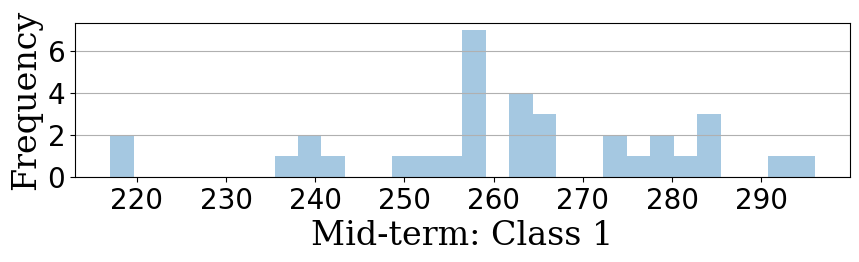

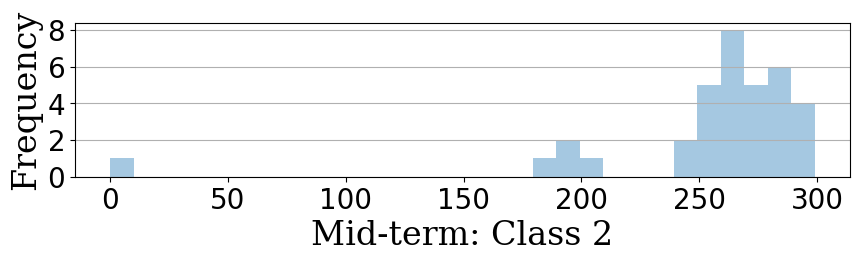

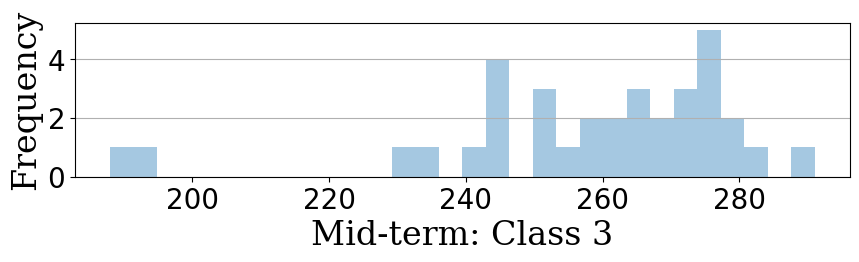

In [140]:
target = 'Mid-term'

for key in df_dict.keys():
    rcParams['figure.figsize'] = 10,2
    sns.distplot(df_dict[key][target], bins=30, kde=False)
    plt.xticks(fontsize=fontsize, rotation=0)
    plt.yticks(fontsize=fontsize)
    plt.xlabel(target+': Class '+str(key), fontname='serif', fontsize=fontsize+4)
    plt.ylabel('Frequency', fontname='serif', fontsize=fontsize+4)
    plt.grid(axis='y')
    plt.show()

# 각 반별 과제 점수분포 현황

- 중간고사 점수가 높은 학생들이 과제 점수도 높은 경향 (43% ~ 53% 상관성)
- 중간고사 보다도 과제들의 상관성이 훨씬 높음
    - 과제점수가 높은 학생들은 지속적으로 높고 낮은 학생들은 지속적으로 낮은 경향 (63% ~ 83% 상관성)
- 각 반별 과제점수 분포 차이는 적은편

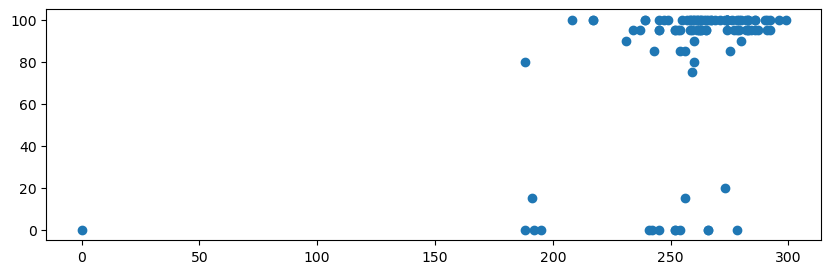

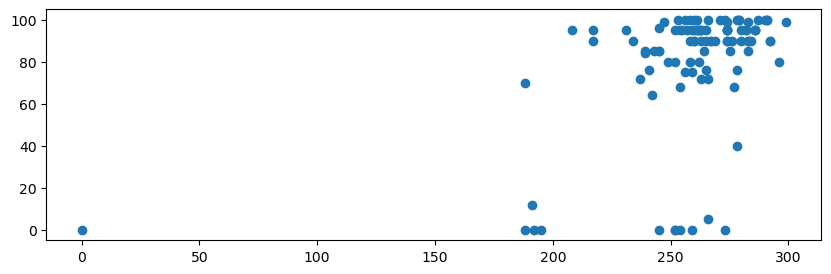

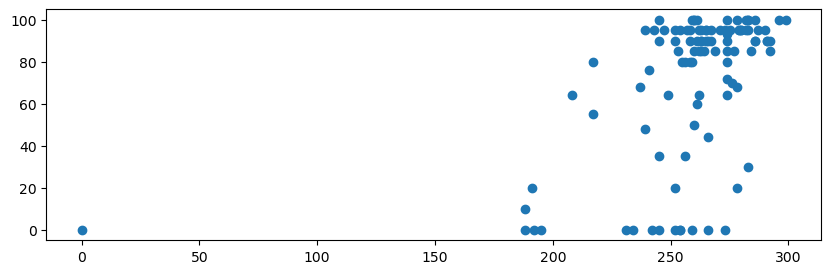

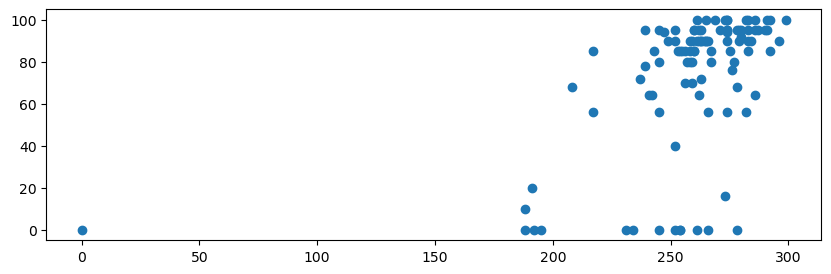

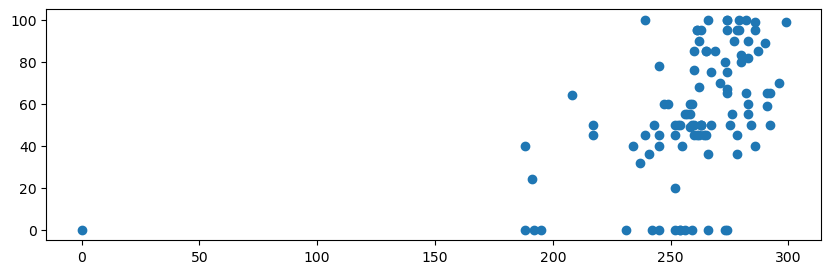

In [187]:
# X축: 중간고사, Y축: 각 과제
rcParams['figure.figsize'] = 10,3
for col in df.iloc[:,8:].columns:
    plt.scatter(df['Mid-term'], df[col])
    plt.show()

In [180]:
df.iloc[:,7:].corr()

,Mid-term,Task(InputOutput),Task(InputVariable),Task(ConditionLoop),Task(Function),Tast(InputNumpy)
Mid-term,1.000000,0.438239,0.476841,0.504893,0.518678,0.459657
Task(InputOutput),0.438239,1.000000,0.743367,0.720999,0.703574,0.639006
Task(InputVariable),0.476841,0.743367,1.000000,0.680805,0.695009,0.638176
Task(ConditionLoop),0.504893,0.720999,0.680805,1.000000,0.875507,0.779313
Task(Function),0.518678,0.703574,0.695009,0.875507,1.000000,0.757711
Tast(InputNumpy),0.459657,0.639006,0.638176,0.779313,0.757711,1.000000


In [156]:
for key in df_dict.keys():
    print('Class '+str(key))
    display(df_dict[key].iloc[:,8:].describe())

Class 1


,Task(InputOutput),Task(InputVariable),Task(ConditionLoop),Task(Function),Tast(InputNumpy)
count,34.000000,34.000000,34.000000,34.000000,34.000000
mean,93.529412,81.617647,78.970588,83.411765,57.794118
std,17.430790,26.315124,27.171158,17.814052,25.586193
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.000000,81.000000,72.500000,80.000000,50.000000
50%,100.000000,90.000000,90.000000,90.000000,55.000000
75%,100.000000,95.000000,95.000000,95.000000,73.750000
max,100.000000,100.000000,100.000000,100.000000,100.000000


Class 2


,Task(InputOutput),Task(InputVariable),Task(ConditionLoop),Task(Function),Tast(InputNumpy)
count,35.000000,35.000000,35.000000,35.000000,35.000000
mean,81.000000,79.200000,71.485714,69.514286,53.514286
std,36.557771,32.905211,33.886811,35.832430,32.525439
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.000000,78.000000,64.000000,64.000000,38.000000
50%,100.000000,95.000000,85.000000,85.000000,50.000000
75%,100.000000,97.000000,95.000000,95.000000,80.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000


Class 3


,Task(InputOutput),Task(InputVariable),Task(ConditionLoop),Task(Function),Tast(InputNumpy)
count,34.000000,34.000000,34.000000,34.000000,34.000000
mean,71.617647,77.205882,62.000000,65.647059,54.529412
std,41.664617,31.325060,40.032563,38.127285,33.135384
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,73.000000,20.000000,44.000000,40.000000
50%,95.000000,90.000000,85.000000,85.000000,52.500000
75%,100.000000,95.000000,93.750000,95.000000,83.750000
max,100.000000,100.000000,100.000000,100.000000,100.000000


## 1반(Class 1) 등수짐작을 위한 분포

- 과제점수가 높은 학생들은 지속적으로 높고 낮은 학생들은 지속적으로 낮은 경향

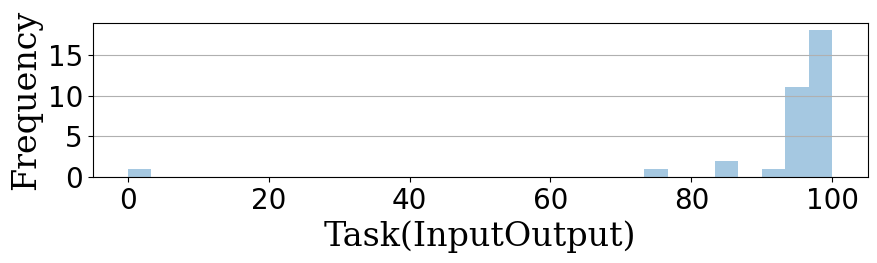

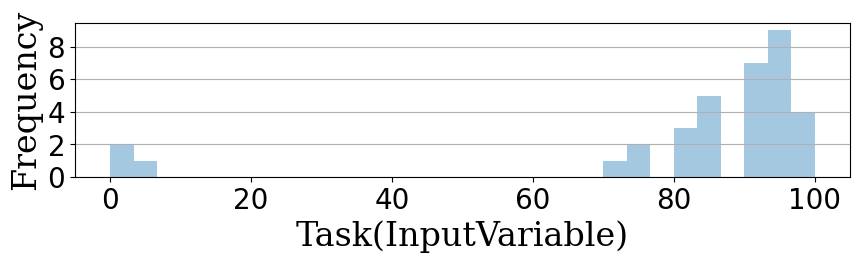

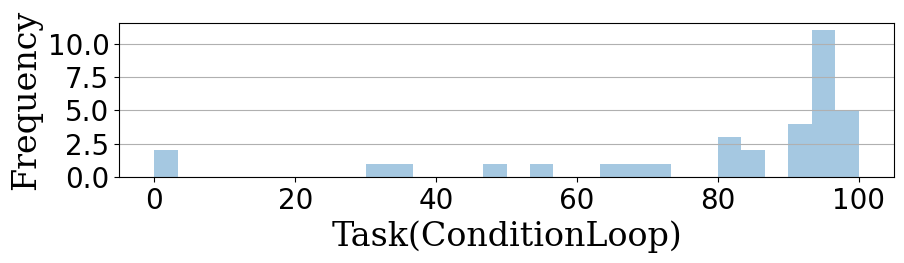

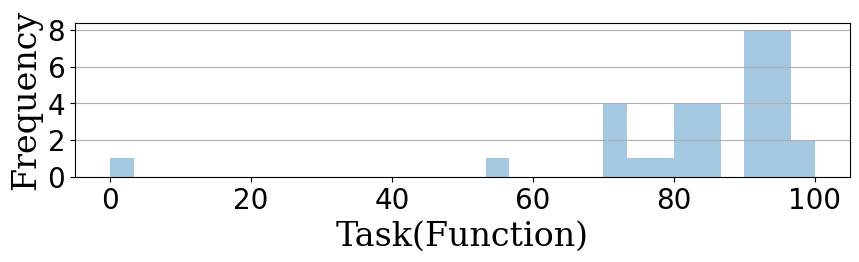

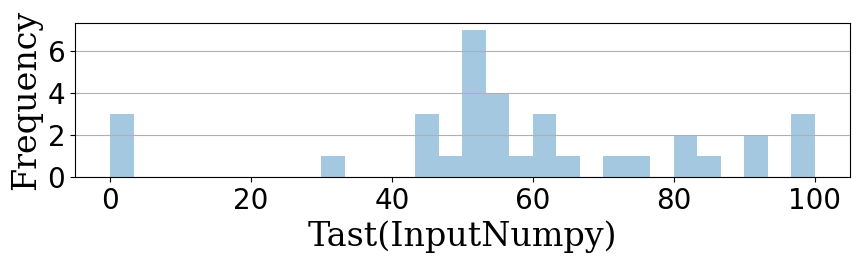

In [157]:
for col in df_dict[1].iloc[:,8:].columns:
    rcParams['figure.figsize'] = 10,2
    sns.distplot(df_dict[1].iloc[:,8:][col], bins=30, kde=False)
    plt.xticks(fontsize=fontsize, rotation=0)
    plt.yticks(fontsize=fontsize)
    plt.xlabel(col, fontname='serif', fontsize=fontsize+4)
    plt.ylabel('Frequency', fontname='serif', fontsize=fontsize+4)
    plt.grid(axis='y')
    plt.show()

In [176]:
df_temp = pd.concat([df_dict[1]['Identity'], 
                     df_dict[1].iloc[:,7:],
                     pd.DataFrame(df_dict[1].iloc[:,7:].sum(axis=1), columns=['Total'])], axis=1)
df_temp.sort_values(by='Total', ascending=False)

,Identity,Mid-term,Task(InputOutput),Task(InputVariable),Task(ConditionLoop),Task(Function),Tast(InputNumpy),Total
14,202100758,282,100,95,95,100,100,772
28,201900814,279,95,100,95,90,100,759
7,202100789,283,100,99,100,95,82,759
20,201501988,283,95,90,100,90,90,748
30,202000131,274,100,95,100,95,75,739
25,202100773,296,100,80,100,90,70,736
26,202100782,265,95,95,95,100,85,735
21,201600762,280,90,95,95,92,83,735
1,201902837,291,100,100,90,95,59,735
18,201800855,262,95,95,85,95,90,722


## 2반(Class 2) 등수짐작을 위한 분포

- 과제점수가 높은 학생들은 지속적으로 높고 낮은 학생들은 지속적으로 낮은 경향

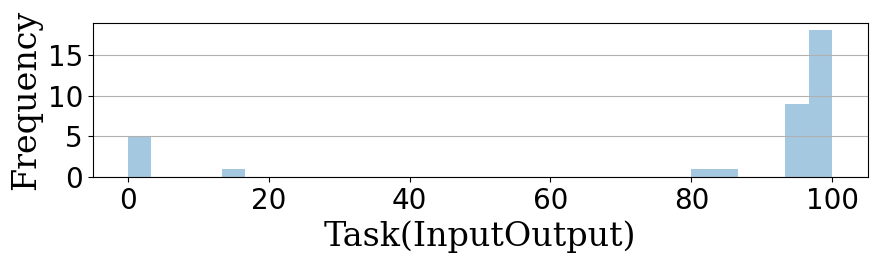

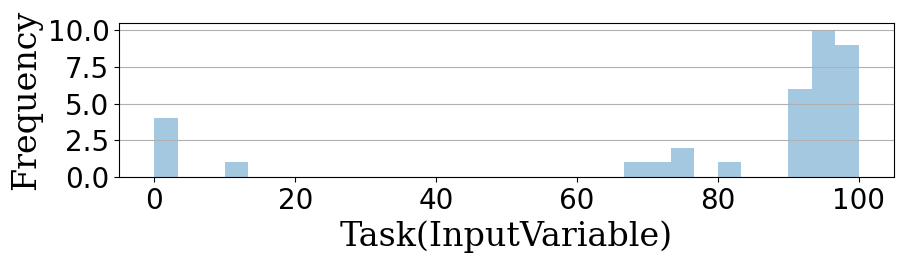

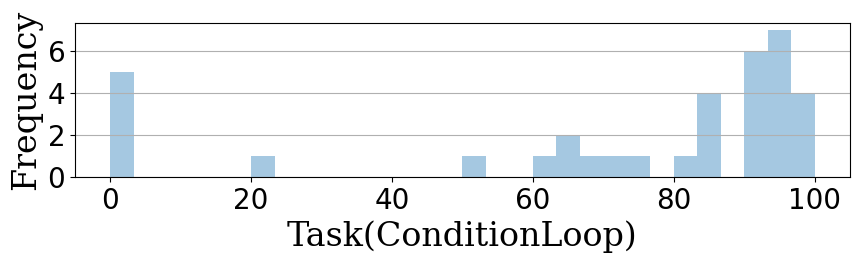

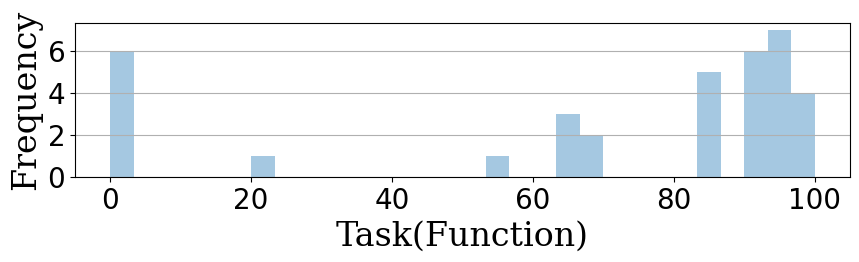

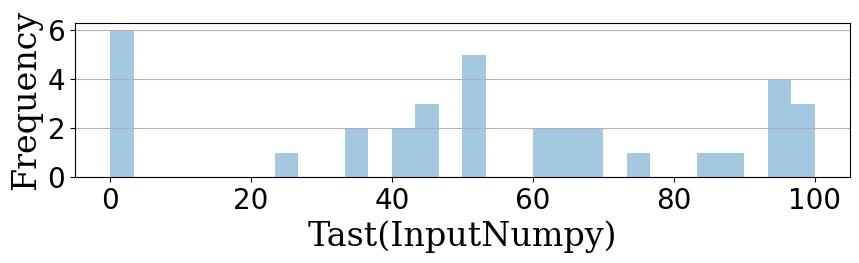

In [188]:
for col in df_dict[2].iloc[:,8:].columns:
    rcParams['figure.figsize'] = 10,2
    sns.distplot(df_dict[2].iloc[:,8:][col], bins=30, kde=False)
    plt.xticks(fontsize=fontsize, rotation=0)
    plt.yticks(fontsize=fontsize)
    plt.xlabel(col, fontname='serif', fontsize=fontsize+4)
    plt.ylabel('Frequency', fontname='serif', fontsize=fontsize+4)
    plt.grid(axis='y')
    plt.show()

In [190]:
df_temp = pd.concat([df_dict[2]['Identity'], 
                     df_dict[2].iloc[:,7:],
                     pd.DataFrame(df_dict[2].iloc[:,7:].sum(axis=1), columns=['Total'])], axis=1)
df_temp.sort_values(by='Total', ascending=False)

,Identity,Mid-term,Task(InputOutput),Task(InputVariable),Task(ConditionLoop),Task(Function),Tast(InputNumpy),Total
59,201700879,299,100,99,100,100,99,797
63,202100756,286,100,95,100,95,95,771
51,201800846,286,100,95,90,100,99,770
37,202100795,290,100,100,95,95,89,769
61,201800944,278,100,100,100,95,95,768
40,202100745,279,100,100,95,95,95,764
52,201902824,287,95,100,95,95,85,757
66,202100759,266,100,100,90,90,100,746
35,202100790,260,100,100,100,95,76,731
38,202100736,283,100,90,95,100,60,728


## 3반(Class 3) 등수짐작을 위한 분포

- 과제점수가 높은 학생들은 지속적으로 높고 낮은 학생들은 지속적으로 낮은 경향

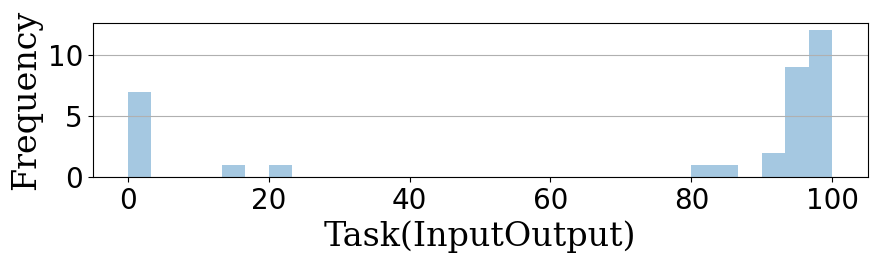

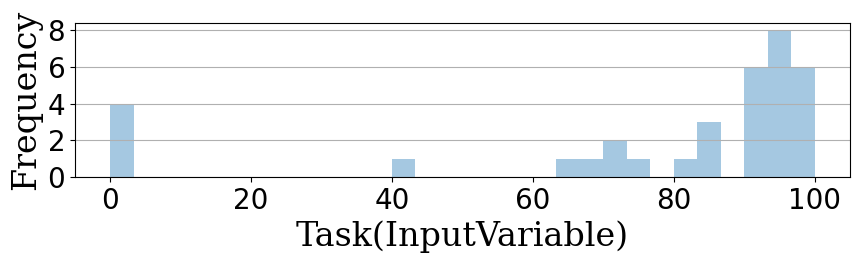

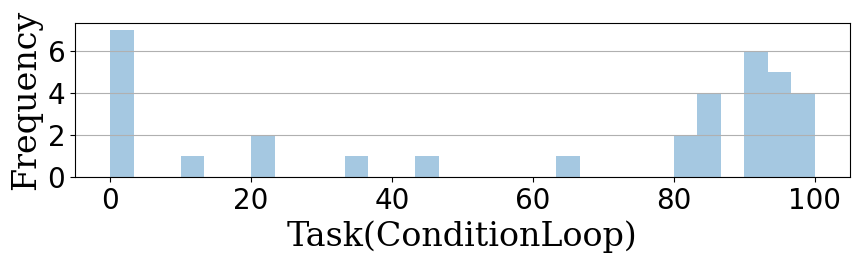

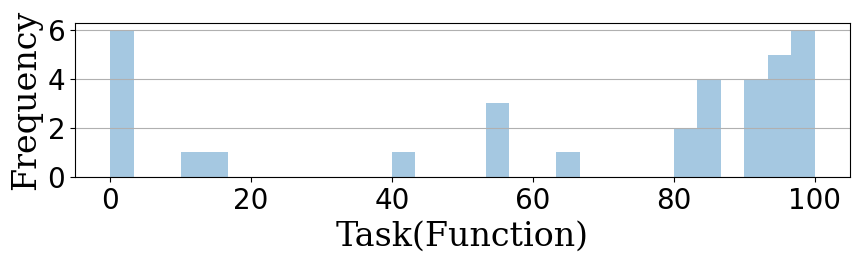

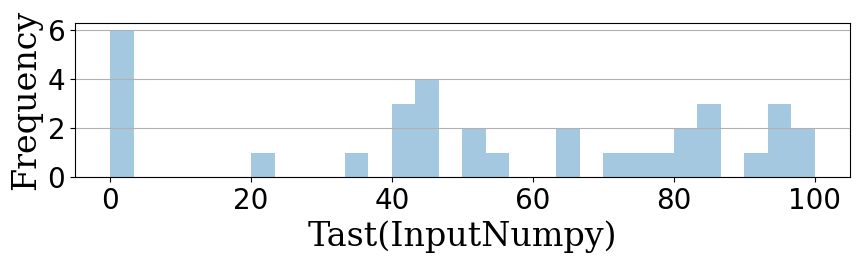

In [192]:
for col in df_dict[3].iloc[:,8:].columns:
    rcParams['figure.figsize'] = 10,2
    sns.distplot(df_dict[3].iloc[:,8:][col], bins=30, kde=False)
    plt.xticks(fontsize=fontsize, rotation=0)
    plt.yticks(fontsize=fontsize)
    plt.xlabel(col, fontname='serif', fontsize=fontsize+4)
    plt.ylabel('Frequency', fontname='serif', fontsize=fontsize+4)
    plt.grid(axis='y')
    plt.show()

In [191]:
df_temp = pd.concat([df_dict[3]['Identity'], 
                     df_dict[3].iloc[:,7:],
                     pd.DataFrame(df_dict[3].iloc[:,7:].sum(axis=1), columns=['Total'])], axis=1)
df_temp.sort_values(by='Total', ascending=False)

,Identity,Mid-term,Task(InputOutput),Task(InputVariable),Task(ConditionLoop),Task(Function),Tast(InputNumpy),Total
80,202100855,274,100,95,85,100,100,754
79,202100829,261,100,95,100,100,95,751
76,202100836,273,100,100,95,100,80,748
95,202100839,274,100,99,80,94,100,747
82,202100833,291,95,100,90,100,65,741
91,201600960,280,100,90,95,95,80,740
101,201900147,260,100,95,100,95,85,735
78,201900173,261,95,100,90,90,95,731
96,202100819,271,100,100,95,95,70,731
86,202100845,269,100,90,85,100,85,729
